# **Testing of the sampling algorithms**

In this jupyter notebook we will be testing all of sampling methods implemented by us.

**We load our methods from SamplingLIB and other requiered libraries**

In [1]:
import SamplingLIB as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **We create testing data**

We create a few distribution function to demonstrate our methods on.

### **Modified Normal distribution (dim=1)**

In [10]:
def M_normal_posterior(x):
    if x >= 1:
        return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)
    else: 
        return np.exp((x-1)/3) + np.exp((x-1)**3)
    
M_noramal_dimension = 1  # dimension of the parametr
    
M_normal = sp.Sampling(posterior=M_normal_posterior, parametr_dimension=M_noramal_dimension)

### **Banana distribution (dim=2)**

In [2]:
# Inputs:
banana_dim = 2  # dimension of the parametr
banana_mu = np.array([0.5, 1.0])  # prior mean
banana_sigma = 1.0  # prior standard deviation
def banana_G(u):  # forward model
    return (u[0]**2+u[1]**2)
banana_y = 2.0  # observation
banana_gamma = 0.5  # noise standard deviation
def banana_posterior(u): # Unnormalized posterior
    return np.exp(-((banana_y-banana_G(u))**2)/(2*banana_gamma**2)-np.dot(u-banana_mu, u-banana_mu)/(2*banana_sigma**2))

# Sampling instace creation
banana = sp.Sampling(posterior=banana_posterior, parametr_dimension=banana_dim)

## **Basic Metropolis-Hastings**

In this section we will test and visualize the results of MH method.

**MH parametrs for testing**

In [11]:
MH_N = 10000  # number of samples
def MH_proposal_distribution(mu): return np.random.normal(mu, 1)  # proposal distribution function
MH_burnin = 0.1 # burnin period

### **Modified Normal distribution (dim=1)**

**M_normal parametrs for testing**

In [12]:
M_normal_initial = 1

**Calling the method**

In [13]:
M_normal_samples = M_normal.MH(N=MH_N, initial=M_normal_initial, proposal_distribution=MH_proposal_distribution, burnin=MH_burnin)

**Visualization of obtained samples**

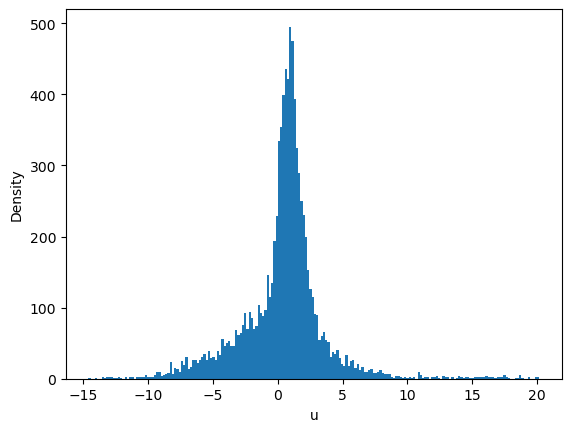

In [14]:
M_normal.visualize(M_normal_samples)

### **Banana distribution (dim=2)**

**Banana parametrs for testing**

In [15]:
banana_initial = np.array([2.0, 3.0])  # initial sample

**Calling the method**

In [16]:
banana_samples = banana.MH(N=MH_N, initial=banana_initial, proposal_distribution=MH_proposal_distribution, burnin=MH_burnin)

**Visualization of obtained samples**

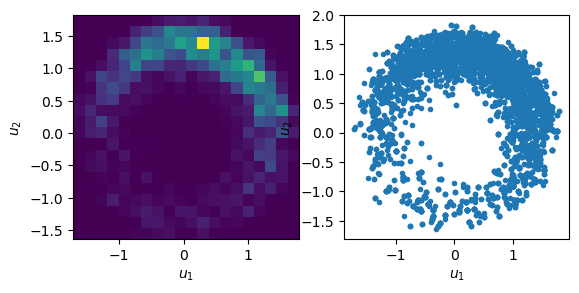

In [17]:
banana.visualize(banana_samples)